In [1]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import json

# Load Data Pada CSV dan Proses menjadi Data Time Series

In [2]:
#Load data csv dan format data tahun bulan menjadi data frame
df = pd.read_csv('DATASET_PAJAK_HOTEL.csv')
df['tahun'] = pd.to_datetime(df['tahun_bulan'])
df.head()

,tahun_bulan,jml_setor,tahun
0,2012-1,183057000,2012-01-01
1,2012-2,227826558,2012-02-01
2,2012-3,183871650,2012-03-01
3,2012-4,210447250,2012-04-01
4,2012-5,133266850,2012-05-01


In [3]:
#Buat data tiemseries berdasar key value dari data frame
dts = pd.Series(data=df['jml_setor'].values, index=df['tahun'])
dts.head()
json_data = dts.to_json(date_format='iso')
print(json_data)
with open('./datasets/restoran.json', 'w') as f:
    json.dump(json_data, f) 

{"2012-01-01T00:00:00.000":183057000,"2012-02-01T00:00:00.000":227826558,"2012-03-01T00:00:00.000":183871650,"2012-04-01T00:00:00.000":210447250,"2012-05-01T00:00:00.000":133266850,"2012-06-01T00:00:00.000":219206350,"2012-07-01T00:00:00.000":124164400,"2012-08-01T00:00:00.000":134640450,"2012-09-01T00:00:00.000":212564750,"2012-10-01T00:00:00.000":173935750,"2012-11-01T00:00:00.000":416368000,"2012-12-01T00:00:00.000":275352000,"2013-01-01T00:00:00.000":349926250,"2013-02-01T00:00:00.000":206785000,"2013-03-01T00:00:00.000":298419900,"2013-04-01T00:00:00.000":520294250,"2013-05-01T00:00:00.000":401312500,"2013-06-01T00:00:00.000":346875000,"2013-07-01T00:00:00.000":316110000,"2013-08-01T00:00:00.000":209607500,"2013-09-01T00:00:00.000":404187500,"2013-10-01T00:00:00.000":375347100,"2013-11-01T00:00:00.000":398383000,"2013-12-01T00:00:00.000":417110000,"2014-01-01T00:00:00.000":343945000,"2014-02-01T00:00:00.000":190308100,"2014-03-01T00:00:00.000":474472500,"2014-04-01T00:00:00.000":2

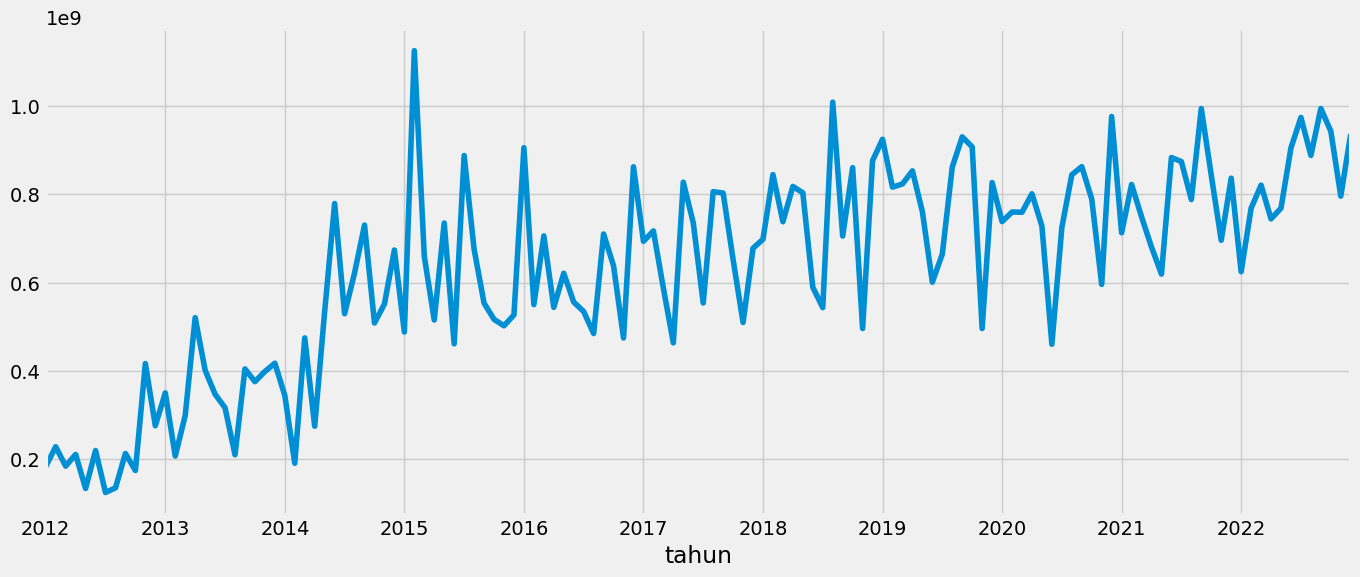

In [4]:
dts.plot(figsize=(15, 6))
plt.show()

# Mencari parameter terbaik ARIMA p, d, q

In [5]:
# Tentukan parameter p, d, dan q untuk mengambil nilai antara 0 sampai 3
p = d = q = range(0, 2)
# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))
# Hasilkan semua kombinasi berbeda dari triplet p, q, dan q musiman
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [5]:
warnings.filterwarnings("ignore")  # specify to ignore warning messages
best_result = [0, 0, 10000000]
p_params = [0, 1, 2, 3]
d_params = [0, 1, 2]
q_params = [0, 1, 2, 3]
P_params = [0, 1, 2, 3]
D_params = [0, 1, 2]
Q_params = [0, 1, 2, 3]
for p in p_params:
    for d in d_params:
        for q in q_params:
            for P in P_params:
                for D in D_params:
                    for Q in Q_params:
                        param = [p, d, q]
                        param_seasonal = [P, D, Q, 12]
                        try:
                            mod = sm.tsa.statespace.SARIMAX(dts, order=param, seasonal_order=param_seasonal)
                            results = mod.fit()
                            if results.aic < best_result[2]:
                                if results.aic > 300:
                                    best_result = [param, param_seasonal, results.aic]
                                    print('Best Result:', best_result)
                        except:
                            continue
print('\nBest Result:', best_result)

Best Result: [[0, 0, 0], [0, 0, 0, 12], 7114.967694272238]
Best Result: [[0, 0, 0], [0, 0, 1, 12], 5693.337601779547]
Best Result: [[0, 0, 0], [0, 1, 0, 12], 4923.7298435569755]
Best Result: [[0, 0, 0], [0, 2, 1, 12], 4446.754346951665]
Best Result: [[0, 0, 0], [0, 2, 2, 12], 4438.329572655415]
Best Result: [[0, 1, 0], [0, 2, 2, 12], 4433.315477977354]
Best Result: [[2, 1, 3], [0, 2, 1, 12], 4423.13769707427]
Best Result: [[2, 1, 3], [0, 2, 2, 12], 4417.676516881265]
Best Result: [[2, 2, 3], [0, 2, 1, 12], 4411.076894793344]
Best Result: [[2, 2, 3], [0, 2, 2, 12], 4406.355160673783]
Best Result: [[3, 2, 3], [0, 2, 1, 12], 4404.461277154755]
Best Result: [[3, 2, 3], [0, 2, 2, 12], 4395.581076734436]

Best Result: [[3, 2, 3], [0, 2, 2, 12], 4395.581076734436]


# Plot model diagnostics

In [6]:
warnings.filterwarnings("ignore") # specify to ignore warning messages
mod = sm.tsa.statespace.SARIMAX(dts,
                                order=(3, 2, 3),
                                seasonal_order=(0, 2, 2, 12),
                                enforce_stationarity=True,
                                enforce_invertibility=True,)

results = mod.fit()

print(results.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                  132
Model:             SARIMAX(3, 2, 3)x(0, 2, [1, 2], 12)   Log Likelihood               -2188.791
Date:                                 Sun, 02 Apr 2023   AIC                           4395.581
Time:                                         07:07:24   BIC                           4419.552
Sample:                                     01-01-2012   HQIC                          4405.297
                                          - 12-01-2022                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5319      1.675     -0.317      0.751      -3.816       2

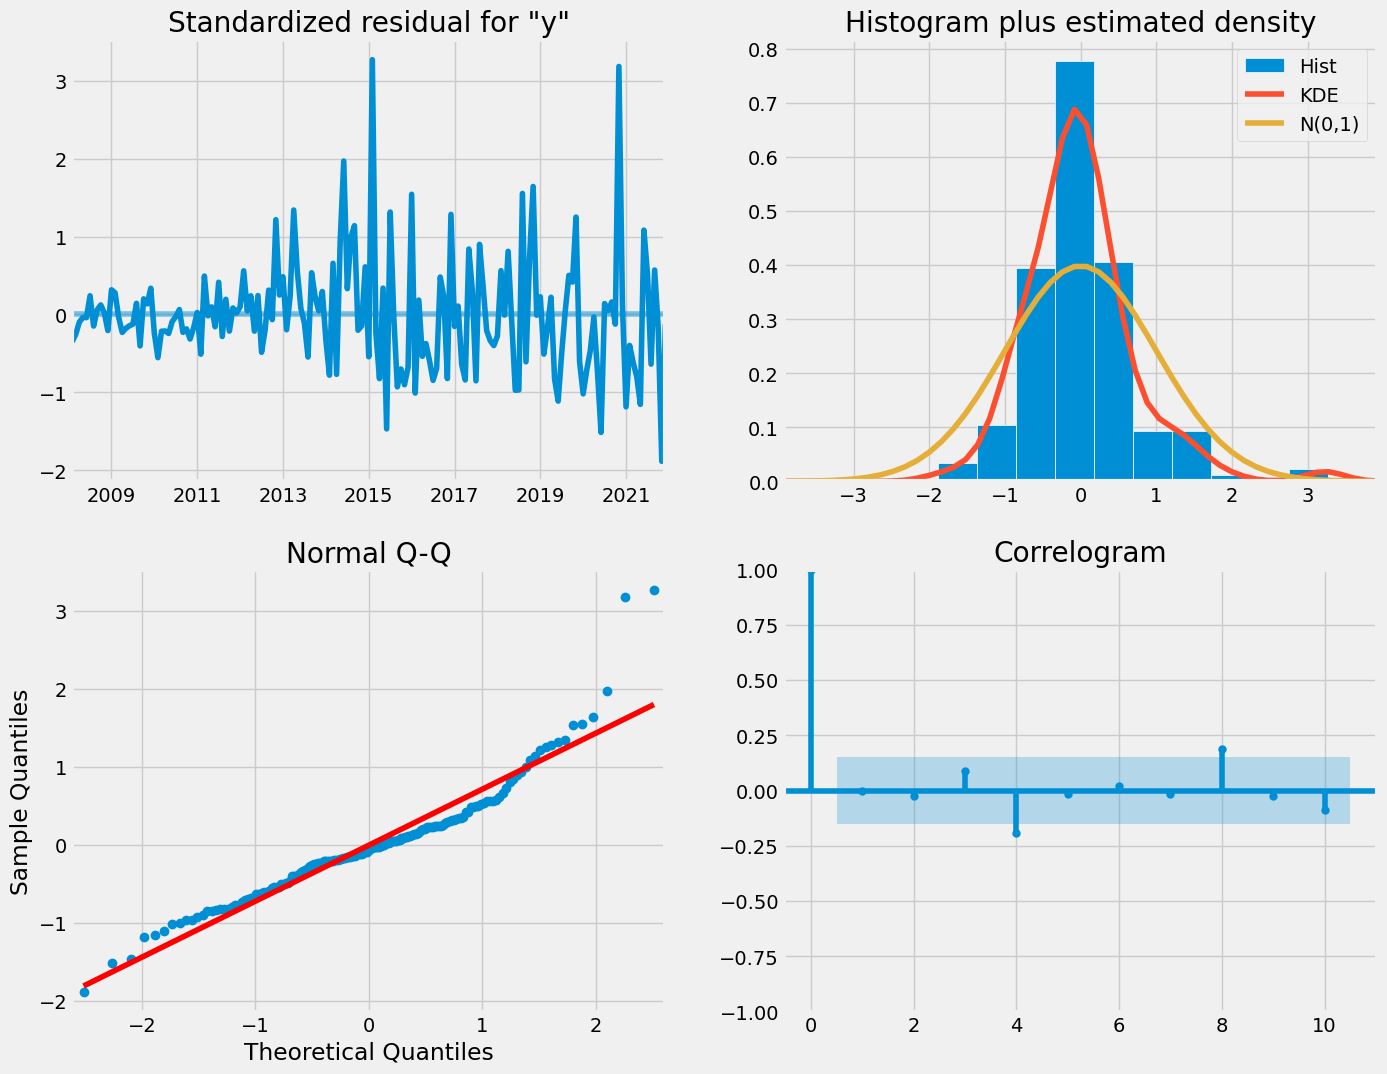

In [8]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [9]:
pred = results.get_prediction(start=pd.to_datetime('2022-01-01'), dynamic=False)
pred_ci = pred.conf_int()

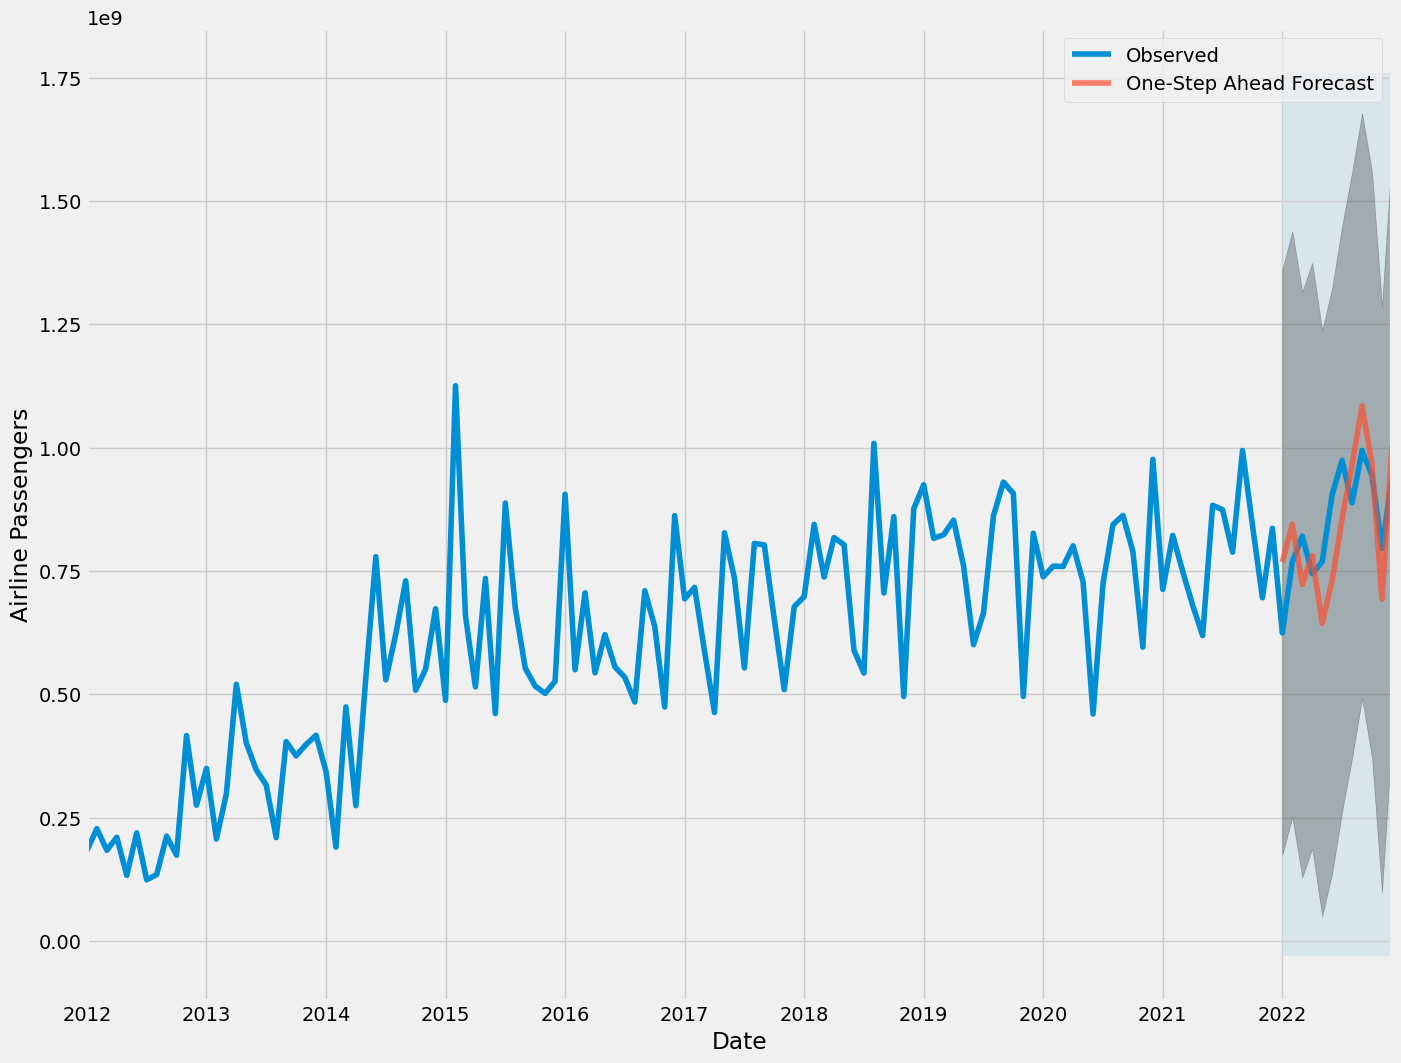

In [10]:
ax = dts['2012':].plot(label='Observed', figsize=(15, 12))
pred.predicted_mean.plot(ax=ax, label='One-Step Ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2022-01-01'), dts.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Airline Passengers')
plt.legend()

plt.show()

In [13]:
df_test = df[df.tahun.between('2022-01', '2022-12')]
dts_test = pd.Series(data=df_test['jml_setor'].values, index=df_test['tahun'])
y_test, pred_ahead = np.array(dts_test), np.array(pred.predicted_mean)
list_ape = []
for index, elem in np.ndenumerate(pred_ahead):
    ape = np.abs(elem-y_test[index]) / y_test[index]
    list_ape.append(ape*100)
mape = np.mean(list_ape)
print(list_ape)
print(mape)

[23.01623531487534, 9.936689240252381, 11.953670148998311, 4.930894108316254, 16.239561834442366, 19.279135816962693, 12.120869947783646, 8.613580289145894, 9.104868181410023, 2.4253454468974076, 12.965203431568167, 7.166304007476051]
11.479363147344044


# Prediksi data selama 2 tahun

In [16]:
# prediksi 24 langkah ke depan di masa mendatang
pred_uc = results.get_forecast(steps=24)
# Dapatkan interval
pred_ci = pred_uc.conf_int()


json_data = pred_uc.predicted_mean.to_json(date_format='iso')
print(json_data)
with open('./datasets/restoran_predicted.json', 'w') as f:
    json.dump(json_data, f) 

{"2022-01-01T00:00:00.000":809502852.4174873829,"2022-02-01T00:00:00.000":834878700.1637166739,"2022-03-01T00:00:00.000":802037740.1630702019,"2022-04-01T00:00:00.000":777352543.0896954536,"2022-05-01T00:00:00.000":790953164.900742054,"2022-06-01T00:00:00.000":743712229.0298480988,"2022-07-01T00:00:00.000":783842265.1050058603,"2022-08-01T00:00:00.000":863917404.3164401054,"2022-09-01T00:00:00.000":906657572.2164422274,"2022-10-01T00:00:00.000":848374095.4544663429,"2022-11-01T00:00:00.000":970873411.5505005121,"2022-12-01T00:00:00.000":897090230.50218606,"2023-01-01T00:00:00.000":846843725.7716323137,"2023-02-01T00:00:00.000":871440422.5385929346,"2023-03-01T00:00:00.000":838573399.4378480911,"2023-04-01T00:00:00.000":813887330.537055254,"2023-05-01T00:00:00.000":827487923.1849153042,"2023-06-01T00:00:00.000":780246986.3384940624,"2023-07-01T00:00:00.000":820377022.3810197115,"2023-08-01T00:00:00.000":900452161.5913624763,"2023-09-01T00:00:00.000":943192329.491328001,"2023-10-01T00:00

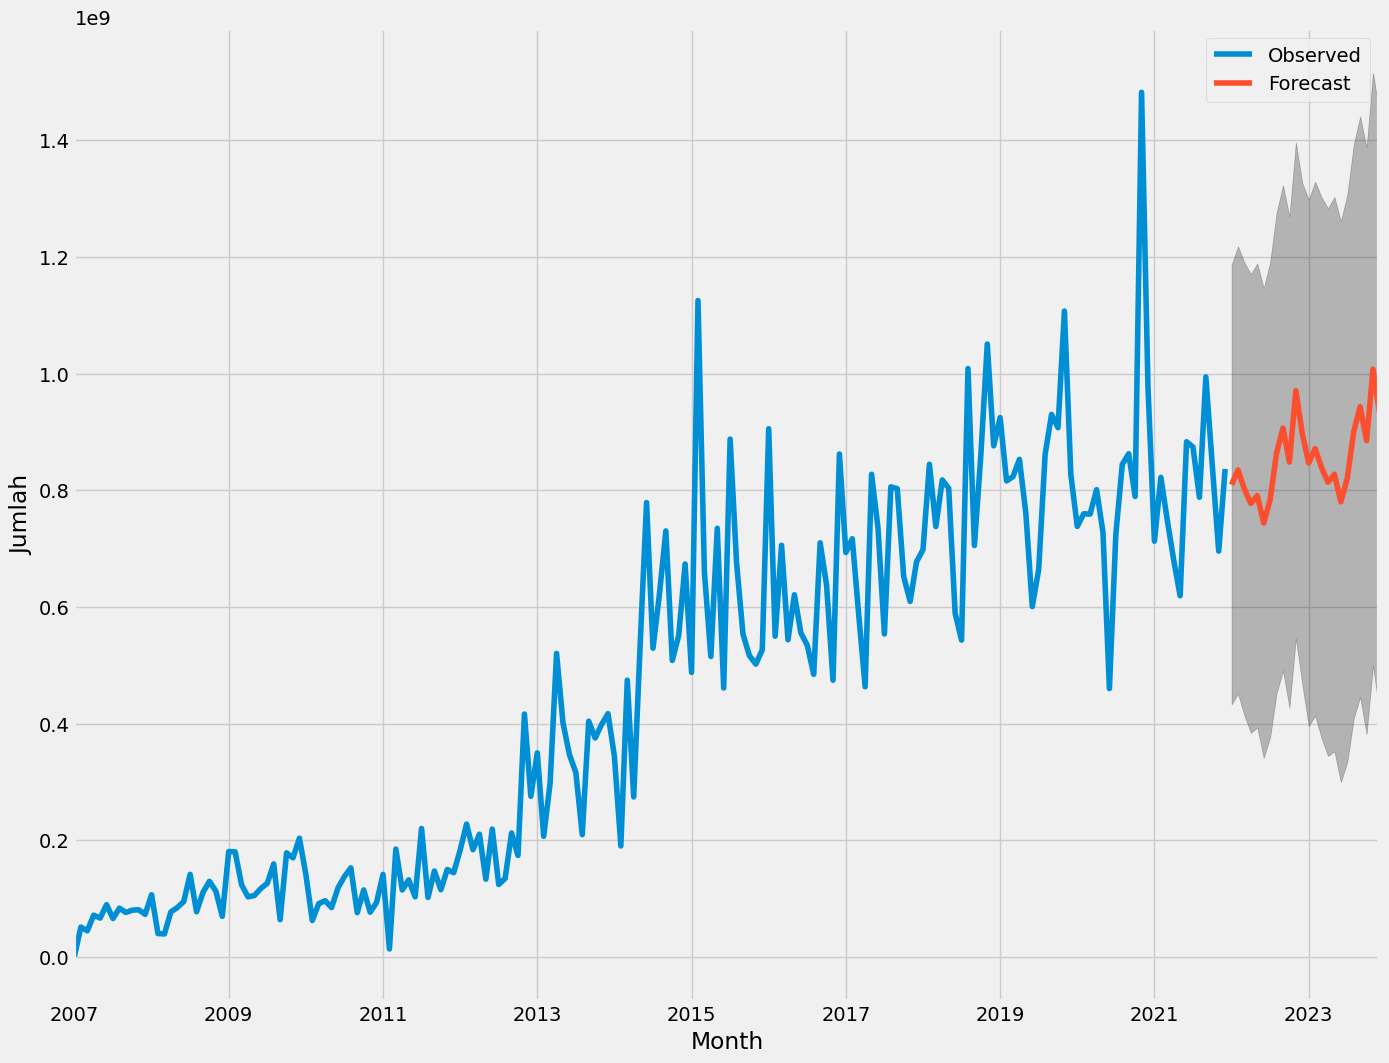

In [17]:
ax = dts.plot(label='Observed', figsize=(15, 12))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Month')
ax.set_ylabel('Jumlah')

plt.legend()
plt.show()